<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/Exercises_chapter13_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression

# Bike counters

In [4]:
bk=pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/hrngv.csv',index_col='date',parse_dates=True) # filenames for other regions: hrngv.csv, sndbr.csv

In [ ]:
bk

## Data description



nbikes — Number of bikes per day

tmpc —  Air Temperature in C

relh — Relative Humidity in %

vsby — Visibility in miles

sknt — Wind Speed in knots

drct — Wind Direction in degrees from true north

holiday — If the day is a holiday

PRCP — Precipitation in mm

TAVG — Average temperature in C

dry day — if the PRCP value equals 0 

phenomenon — weather phenomenon

weekday — day of the week

daylight_hrs — amount of hours of light a day

## Some functions that we might need:






`sns.boxenplot(x='',y='',data=mydata)`

`sns.pairplot(mydata)`


```
#fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(bk.corr()) # cmap='RdBu', annot=True
```


```
#define IDVs and DV
X = bk[['']]
y = bk['']

#add constant variable
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#save predicted values in a df
bk['predicted'] = model.predict(X)

#view model summary
print(model.summary())

```



```
bk[['nbikes', 'predicted']].plot(alpha=0.5);
```



```
!pip install stargazer -q
from stargazer.stargazer import Stargazer
m_compare=Stargazer([model_1,model_2])
m_compare

m_compare.render_latex()
m_compare.render_html()
```


`bk['holiday']=bk['holiday'].astype('category').cat.codes`

`bk=pd.get_dummies(bk, columns=['weekday'], prefix = '', prefix_sep='')`

`bk.corr()`


# Data Visualization


In [ ]:
#fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(bk.corr()) # cmap='RdBu', annot=True

# Setting-up RQ and hypothesis



# Simple bi-variate regression

In [ ]:
X = bk[['tmpc']]
y = bk['nbikes']


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model_1 = sm.OLS(y, X).fit()
bk['predicted_1'] = model_1.predict(X)
#view model summary
print(model_1.summary())

In [ ]:
# plot the data and predicted variables


# Multivariate regression

In [ ]:
X = bk[['tmpc', 'relh']]
y = bk['nbikes']

#add constant to predictor variables

#fit linear regression model

#view model summary



In [ ]:
# defining data
X = bk[['tmpc','relh', 'vsby', 'sknt']]
y = bk['nbikes']

#add constant to predictor variables

#fit linear regression model

#view model summary


# Multivariate regression with categorical IDVs

## Transforming categorical variables

In [ ]:
#pd.get_dummies(bk, columns=[''], prefix = '', prefix_sep='')

In [6]:
# bk['holiday']=bk['holiday'].astype('category').cat.codes # works for binary variable

## Visulizing new heatmap

## Making regression models according to our hypothesis

In [ ]:
bk.columns

In [ ]:
X = bk[[]]
y = bk['nbikes']

#no need to add constant to predictor variables

#fit linear regression model
model = sm.OLS(y, X).fit()
bk['predicted'] = model.predict(X)
#view model summary
print(model.summary())

# Comparing model results

In [ ]:
!pip install stargazer -q
from stargazer.stargazer import Stargazer

In [ ]:
m_compare=Stargazer([model_1,model_2])
m_compare

# Check the regression

Ex-ante checks:
- Number of observations (>10)
- Type of dependent variable (categorical/continous)
- Linearity (linear dependence)

Ex-post checks (with potentially model refinement)
- Multicollinearity (VIF)
- Outlier (Cook's distance)
- Normal distribution of residuals (QQplot, Shapiro-Wilk) (non-linear transformation to fix)
- Heteroscedasticity (Breusch-Pagan)
- Autocorrelation (spatial - Moran-correlation coefficient I /temporal - Panel & time series analysis)

## Test for normality of residuals

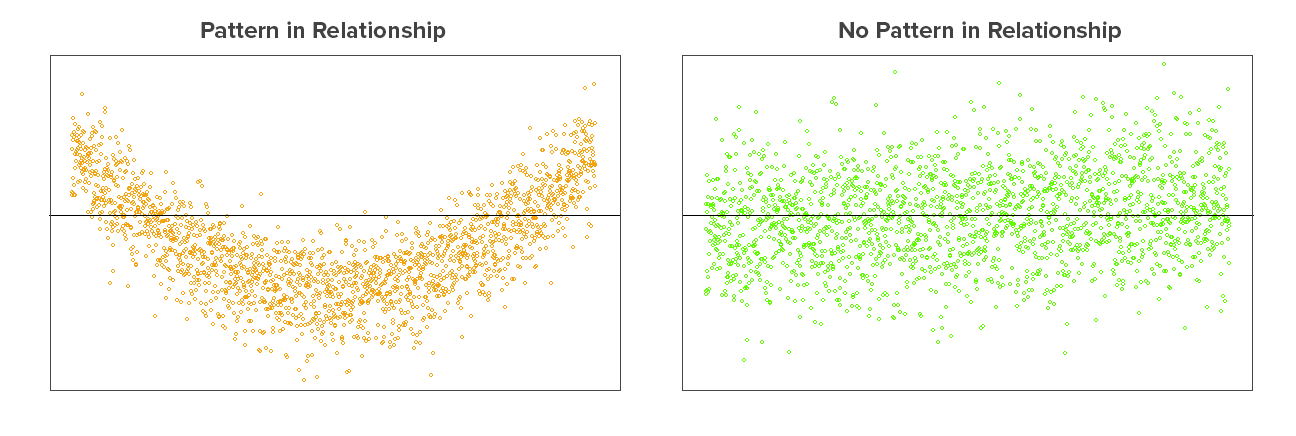

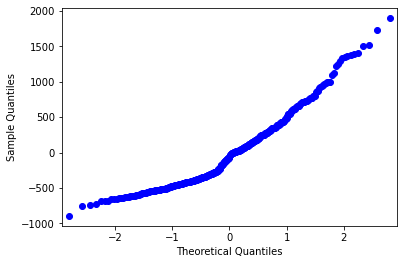

In [ ]:
# Normality of residuals
fig = sm.qqplot(model.resid)
plt.show()

## Test fo Multicollinearity (VIF)

In [ ]:
#test fo Multicollinearity (VIF)

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('nbikes ~ tmpc+relh+vsby+TAVG', data=bk, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

## Test for heteroscedasticity

In [ ]:
# Heteroscedasticity (exact: Breusch-Pagan test)
ax = sns.residplot(x=bk['predicted_3'], y=model_3.resid, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

# Discussing results

Check your hypothesis (supported/unsupported).

Explain statistically significant relations.

Discuss the limitations of your model:

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days).